In [6]:
import pandas as pd

import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler


from sklearn.neural_network import MLPClassifier

from sklearn.metrics import accuracy_score
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import classification_report

from sklearn.model_selection import GridSearchCV

## Loading the data

In [375]:
data = pd.read_excel('medical_data_prepro_ver1.xlsx',sheet_name = 'remove_duplicate')


In [260]:
data.isnull().sum()

Patient                   0
Diagnosis                 0
Date                      0
Gender                    0
Age                       0
CMV IgM                 376
CMV IgG                 376
HSV IgM                 438
HSV IgG                 527
VZV IgM                 477
VZV IgG                 469
WBC COUNT                48
Lymphocyte(#)            61
Lymphocyte(%)            61
Monocyte(#)              61
Monocyte(%)              61
Neutrophil(#)            61
Neutrophil(%)           225
ESR                     352
CRP                     442
CMV PCR[EYE]            729
HSV type I PCR[EYE]     725
HSV type II PCR[EYE]    725
VZV PCR[EYE]            745
dtype: int64

In [376]:
data = data.fillna(data.mean(numeric_only=True))

In [262]:
data.isnull().sum()

Patient                   0
Diagnosis                 0
Date                      0
Gender                    0
Age                       0
CMV IgM                   0
CMV IgG                   0
HSV IgM                   0
HSV IgG                   0
VZV IgM                   0
VZV IgG                   0
WBC COUNT                 0
Lymphocyte(#)             0
Lymphocyte(%)             0
Monocyte(#)               0
Monocyte(%)               0
Neutrophil(#)             0
Neutrophil(%)             0
ESR                       0
CRP                       0
CMV PCR[EYE]            729
HSV type I PCR[EYE]       0
HSV type II PCR[EYE]      0
VZV PCR[EYE]              0
dtype: int64

In [377]:
df_X = data[['Gender', 'Age', 'CMV IgM', 'CMV IgG',
       'HSV IgM', 'HSV IgG', 'VZV IgM', 'VZV IgG', 'WBC COUNT',
       'Lymphocyte(#)', 'Lymphocyte(%)', 'Monocyte(#)', 'Monocyte(%)',
       'Neutrophil(#)', 'Neutrophil(%)', 'ESR', 'CRP']]
df_Y = data['Diagnosis']

<AxesSubplot:>

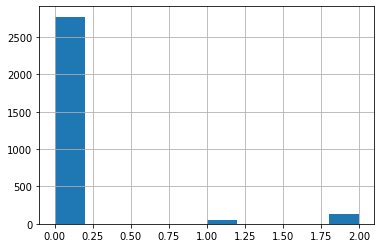

In [323]:
df_Y.hist()

In [356]:
from sklearn.model_selection import StratifiedShuffleSplit


split = StratifiedShuffleSplit(n_splits=1, test_size = 0.2, random_state = 2022)

for train_idx, test_idx in split.split(df_X,df_Y):
    X_train = df_X.loc[train_idx]
    X_test = df_X.loc[test_idx]
    y_train = df_Y.loc[train_idx]
    y_test = df_Y.loc[test_idx]

In [360]:
# Import required libraries
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import sklearn

# Import necessary modules
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from math import sqrt
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import KFold
from sklearn.model_selection import LeaveOneOut
from sklearn.model_selection import LeavePOut
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import StratifiedKFold

In [382]:
skfold = StratifiedKFold(n_splits=10, random_state=2022, shuffle=True)
n_iter = 0
accuracy_list = []
mlp_clf = MLPClassifier(hidden_layer_sizes=(150,100,50),
                        max_iter = 150,activation = 'relu',
                        solver = 'adam')
                        
for train_index, test_index in skfold.split(df_X_scaled,df_Y):
    n_iter += 1
    X_train = df_X.loc[train_idx]
    X_test = df_X.loc[test_idx]
    y_train = df_Y.loc[train_idx]
    y_test = df_Y.loc[test_idx]

    mlp_clf.fit(X_train, y_train)
    y_pred = mlp_clf.predict(X_test)
    print('*******cross validation********** : {}'.format(n_iter))
    print('교차 검증 정확도 : {:.2f}'.format(accuracy_score(y_test, y_pred)))
    #print('학습 레이블 데이터 분포 : \n', y_train.value_counts() )
    #print('학습 레이블 데이터 분포 : \n', y_test.value_counts() )
    accuracy_list.append(accuracy_score(y_test, y_pred))
print(sum(accuracy_list)/n_iter)



# model_skfold = MLPClassifier(hidden_layer_sizes=(150,100,50),
#                         max_iter = 150,activation = 'relu',
#                         solver = 'adam')
# results_skfold = model_selection.cross_val_score(model_skfold, df_X, df_Y, cv=skfold)
# print("Accuracy: %.2f%%" % (results_skfold.mean()*100.0))

*******cross validation********** : 1
교차 검증 정확도 : 0.94
*******cross validation********** : 2
교차 검증 정확도 : 0.94
*******cross validation********** : 3
교차 검증 정확도 : 0.94
*******cross validation********** : 4
교차 검증 정확도 : 0.94
*******cross validation********** : 5
교차 검증 정확도 : 0.94
*******cross validation********** : 6
교차 검증 정확도 : 0.94
*******cross validation********** : 7
교차 검증 정확도 : 0.94
*******cross validation********** : 8
교차 검증 정확도 : 0.94
*******cross validation********** : 9
교차 검증 정확도 : 0.94
*******cross validation********** : 10
교차 검증 정확도 : 0.94
0.9369308600337268


<AxesSubplot:>

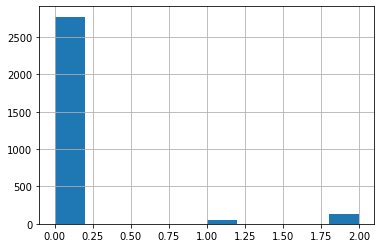

In [355]:
df_Y.hist()

<AxesSubplot:>

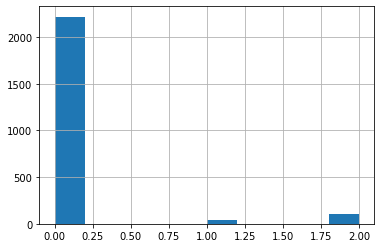

In [357]:
y_train.hist()

<AxesSubplot:>

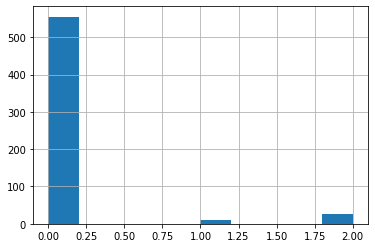

In [358]:
y_test.hist()

## Imbalanced data

In [353]:
def print_class_num(df, label_name):            # 클래스의 비율을 알아보기 위한 함수
  n_total = len(df)                             # 데이터의 총 개수
  n_0 = len(df.query(label_name + ' == 0'))   # label로 0을 사용하는 열 개수
  n_1 = len(df.query(label_name + ' == 1'))   # label로 1을 사용하는 열 개수
  n_2 = len(df.query(label_name + ' == 2'))   # label로 2을 사용하는 열 개수
 

  print("NIU (0) : {}개, {:.2f}%".format(n_0, n_0*100/n_total))
  print("ARN (1) : {}개, {:.2f}%\n".format(n_1, n_1*100/n_total))
  print("CMV (2) : {}개, {:.2f}%\n".format(n_2, n_2*100/n_total))

  values = df[label_name].value_counts()        # label로 사용하는 열의 값을 카운트 
  values.plot(kind='bar')
  print(values)

## Scaler

In [269]:
X_train.shape

(654, 17)

In [213]:
sc=StandardScaler()

scaler = sc.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [285]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler()
scaler = sc.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [298]:
from sklearn.preprocessing import RobustScaler
sc = RobustScaler()
scaler = sc.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [378]:
from sklearn.preprocessing import RobustScaler
sc = RobustScaler()
scaler = sc.fit(df_X)
df_X_scaled = scaler.transform(df_X)


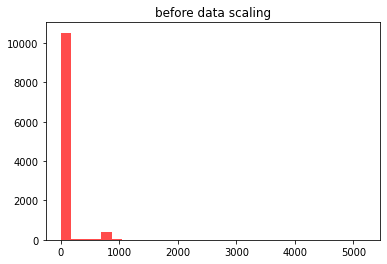

In [311]:
X_train_data = X_train.to_numpy().reshape(11118,1)
plt.hist(X_train_data, bins=30, color='red', alpha = 0.7)
plt.title('before data scaling')
plt.show()

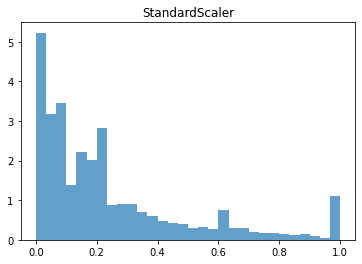

In [273]:
X_train_scaled_ss = X_train_scaled.reshape(11118,1)
plt.hist(X_train_scaled_ss, bins=30, alpha = 0.7, density = True)
plt.title('StandardScaler')
plt.show()

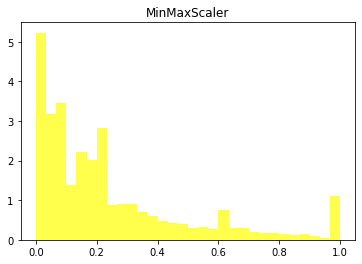

In [286]:
X_train_scaled_mm = X_train_scaled.reshape(11118,1)
plt.hist(X_train_scaled_mm, bins=30, alpha = 0.7, density = True, color='yellow')
plt.title('MinMaxScaler')
plt.show()

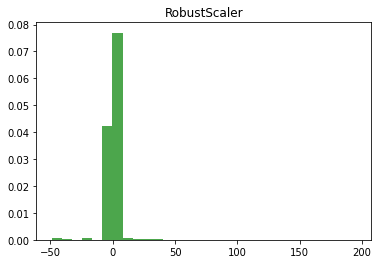

In [299]:
X_train_scaled_rb = X_train_scaled.reshape(11118,1)
plt.hist(X_train_scaled_rb, bins=30, alpha = 0.7, density = True, color='green')
plt.title('RobustScaler')
plt.show()

## MLP Classifier

In [312]:
mlp_clf = MLPClassifier(hidden_layer_sizes=(150,100,50),
                        max_iter = 150,activation = 'relu',
                        solver = 'adam')

mlp_clf.fit(X_train, y_train)

MLPClassifier(hidden_layer_sizes=(150, 100, 50), max_iter=150)

In [313]:
y_pred = mlp_clf.predict(X_test)

print('Accuracy: {:.2f}'.format(accuracy_score(y_test, y_pred)))

Accuracy: 0.58


/Users/hana/Library/Python/3.8/lib/python/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


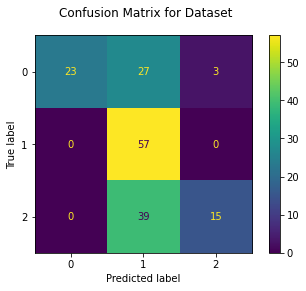

In [314]:
fig = plot_confusion_matrix(mlp_clf, X_test, y_test, display_labels=mlp_clf.classes_)
fig.figure_.suptitle("Confusion Matrix for Dataset")
plt.show()

In [315]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.43      0.61        53
           1       0.46      1.00      0.63        57
           2       0.83      0.28      0.42        54

    accuracy                           0.58       164
   macro avg       0.77      0.57      0.55       164
weighted avg       0.76      0.58      0.55       164



## Load Data

In [189]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.94      0.99      0.97       555
           1       0.00      0.00      0.00        11
           2       0.50      0.15      0.23        27

    accuracy                           0.94       593
   macro avg       0.48      0.38      0.40       593
weighted avg       0.90      0.94      0.92       593



/Users/hana/Library/Python/3.8/lib/python/site-packages/sklearn/metrics/_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/hana/Library/Python/3.8/lib/python/site-packages/sklearn/metrics/_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/hana/Library/Python/3.8/lib/python/site-packages/sklearn/metrics/_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


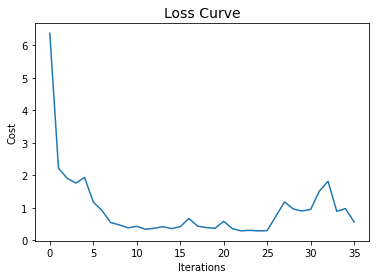

In [190]:
plt.plot(mlp_clf.loss_curve_)
plt.title("Loss Curve", fontsize=14)
plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.show()

## Hyper Parameter Tuning

In [316]:
param_grid = {
    'hidden_layer_sizes': [(150,100,50), (120,80,40), (100,50,30)],
    'max_iter': [50, 100, 120, 150],
    'activation': ['tanh', 'relu'],
    'solver': ['sgd', 'adam'],
    'alpha': [0.0001, 0.05],
    'learning_rate': ['constant','adaptive'],
}

In [317]:
grid = GridSearchCV(mlp_clf, param_grid, n_jobs= -1, cv=5)
grid.fit(X_train, y_train)

print(grid.best_params_) 

/Users/hana/Library/Python/3.8/lib/python/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/hana/Library/Python/3.8/lib/python/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/hana/Library/Python/3.8/lib/python/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/hana/Library/Python/3.8/lib/python/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/hana/Library/Pyth

{'activation': 'tanh', 'alpha': 0.05, 'hidden_layer_sizes': (150, 100, 50), 'learning_rate': 'constant', 'max_iter': 100, 'solver': 'adam'}


/Users/hana/Library/Python/3.8/lib/python/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


In [318]:
grid_predictions = grid.predict(X_test) 

print('Accuracy: {:.2f}'.format(accuracy_score(y_test, grid_predictions)))

Accuracy: 0.76
